# 2.2 Smoothing

Image noise is random variation of brightness or color information in images, is an aspect of electronic noise. It is usually produced by the image sensor.

During this lesson, we are going to learn about some smoothing techniques that may reduce image noise. This will include:

- Convolution-based methods
- Median filter
- Image average

## Problem context - Number-plate recognition

<img src="./images/access_system.png" width="400">

Returning to parking access problem at UMA, they were grateful with your previous work. After some testing, there were some complaints about binarization because is not working as well as they expected, it is suspected that difficulties are caused by image noise. The camera that is being used in the system is having some problems, different type of noise are appearing in captured images. Images `noisy_1.jpg` and `noisy_2.jpg` are examples of those problems.

You are asked again to provide them some help with this problem.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
import random

images_path = './images/'

**What to do?** First, try to **display both images** and see what is the problem.

- What is the difference between them?
- Why can this happen?

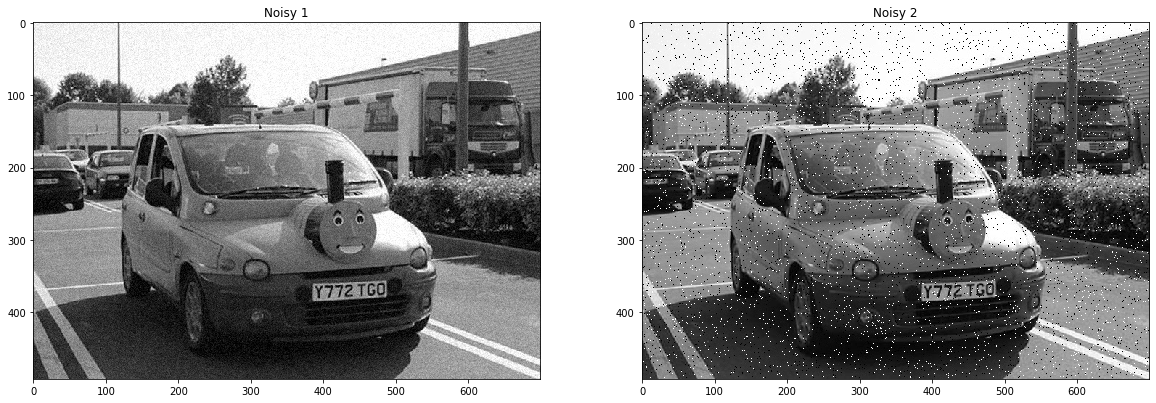

In [11]:
# Read images
noisy_1 = cv2.imread(images_path + 'noisy_1.jpg', 0)
noisy_2 = cv2.imread(images_path + 'noisy_2.jpg', 0)

# Display first one
plt.subplot(121)
plt.imshow(noisy_1, cmap='gray')
plt.title('Noisy 1')

# Display second one
plt.subplot(122)
plt.imshow(noisy_2, cmap='gray')
plt.title('Noisy 2')

plt.show()

### Convolution-based methods

There are some interesting convolution techniques that may solve noise problem.

Convolve an image with a respectively small kernel is similar to apply a function over all the image.
For example, it is possible to apply **neighborhood averaging** using convolution.  
You can think that the kernel is like a weight matrix for neighbor pixels, and convolution like a double `for` loop that applies the kernel pixel by pixel over the image.

**Formal definition**

If the image has $M$ rows and $N$ columns, and the kernel has $m$ rows and $n$ columns, then the size of the output image will have $M - m + 1$ rows, and $N - n + 1$ columns.

*Note that openCV crop resultant image to input image size by default.*

Mathematically we can write the convolution as: 

$$O(i,j) = \Sigma_{k=1}^m \Sigma_{l=1}^n I(i+k-1,j+l-1))K(k,l)$$

Being:
- $O$ convolved image
- $I$ input image
- $K$ kernel

where $i$ runs from $1$ to $M - m + 1$ and $j$ runs from $1$ to $N - n + 1$. 

In adition, you can use [this demo](https://setosa.io/ev/image-kernels/) to understand convolution in a visual way. Anyway, **don't worry if you don't get it at all**, convolution is a complex operation that will be understanded progressively while doing practical exercises. Well... this is your day! That is exactly what we will be doing during this course!

**What to do?** Complete **average_filter** that convolve an image using a constant kernel and display differences between original image and result. It takes the image and kernel aperture size as input

*openCV defines 2D-convolution: [cv2.filter2D](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04). `ddepth` parameter means desired depth of the destination image. Input images use to be 8-bit unsigned integer (`ddepth`=cv2.CV_8U). However, output sometimes is required to be 16-bit signed (`ddepth`=cv2.CV_16S)*

In [5]:
def average_filter(image, w_kernel):
    """ Applies neighborhood averaging to an image and display it.   
    
        Args:
            image: Input image
            w_kernel: Kernel aperture size
    """
    
    # Create kernel
    kernel = np.ones((2*w_kernel+1,2*w_kernel+1),np.float32)/((2*w_kernel+1)**2)
    
    # Convolve image and kernel
    smoothed_img = cv2.filter2D(image,cv2.CV_16S,kernel)
    
    # Show the initial image
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Noisy')
    
    # Show the resultant one
    plt.subplot(122)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Average filter')
    
    plt.show()

**You are asked to** try **average_filter** using both noisy images `noisy_1.jpg` and `noisy_2.jpg`.  
Then, **answer following questions**:

- Is noise removed in first image?
- Is noise removed in second image?
- What is a good value for `w_kernel`?

In [6]:
noisy_img = cv2.imread(images_path + 'noisy_1.jpg', 0)
interact(average_filter, image=fixed(noisy_img), w_kernel=(0,5,1))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), Output()), _dom_classes=('widget-inte…

<function __main__.average_filter(image, w_kernel)>

A better option than neighborhood averaging is **gaussian filtering**, it applies the same concept than averaging but with a more complex kernel.

The idea is taking advantage of normal distribution and create a kernel that conserve borders while smoothing. This is applying more importance to pixels that are near to the one at the center of the kernel. For kernel definition:

$\hspace{8cm}$In 1-D
$$g_{\sigma}(x) = \frac{1}{\sigma\sqrt{2\pi}}exp\left(-\frac{x^2}{2\sigma^2}\right)$$

$\hspace{8cm}$In 2-D:  
$$g_{\sigma}(x,y) = \frac{1}{2\pi\sigma^2}exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$$

**What to do?** Complete **gaussian_filter** in a similar way than previous exercise adding a new input `sigma`, that is the standard desviation of the gaussian distribution used for kernel creation. *Note that NumPy defines mathematical functions that operate over arrays like [exponential](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html) or [square-root](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), it also define mathematical [constants](https://docs.scipy.org/doc/numpy/reference/constants.html) like `np.pi`*.

*Remember associative property of convolution*.

In [62]:
def gaussian_filter(image, w_kernel, sigma):
    """ Applies Gaussian filter to an image and display it.   

        Args:
            image: Input image
            w_kernel: Kernel aperture size
            sigma: standard deviation of Gaussian distribution
    """
    
    # Create kernel using associative property
    s = sigma
    w = w_kernel
    kernel_1D = [np.exp(-z*z/(2*s*s))/np.sqrt(2*np.pi*s*s) for z in range(-w,w+1)] 
    kernel = np.outer(kernel_1D,kernel_1D)
    
    # Convolve image and kernel
    smoothed_img = cv2.filter2D(image,cv2.CV_16S,kernel)
    
    # Show the initial image
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Noisy')
    
    # Show the resultant one
    plt.subplot(122)
    plt.imshow(smoothed_img, cmap='gray')
    plt.title('Gaussian filter')
    
    plt.show()

**You are asked to** try **gaussian_filter** with `noisy_1.jpg` and `noisy_2.jpg`.  
Then, **answer following questions**:

- Is noise removed in first image?
- Is noise removed in second image?
- What are good values for `w_kernel` and `sigma`?

In [61]:
noisy_img = cv2.imread(images_path + 'noisy_1.jpg', 0)
interact(gaussian_filter, image=fixed(noisy_img), w_kernel=(0,5,1), sigma=(1,3,0.3))

interactive(children=(IntSlider(value=2, description='w_kernel', max=5), FloatSlider(value=1.9, description='s…

<function __main__.gaussian_filter(image, w_kernel, sigma)>

### Median filter

There are some other smoothing techniques besides convolution, one of them is median filtering. This method **replaces each pixel with the median of its neighborhood**.  

<img src="./images/median.png" width="600">

**What to do?** Complete **median_filter** in a similar way than previous exercises. It takes the image and window aperture size (w_window) as input.

*Tip: openCV already implements median filtering*

In [7]:
def median_filter(image, w_window):
    """ Applies median filter to an image and display it.   

        Args:
            image: Input image
            w_window: window aperture size
    """
    
    #Apply median filter
    median = cv2.medianBlur(image,w_window*2+1)
    
    # Show the initial image
    plt.subplot(121)
    plt.imshow(noisy_img, cmap='gray')
    plt.title('Noisy')
    
    # Show the resultant one
    plt.subplot(122)
    plt.imshow(median, cmap='gray')
    plt.title('Median filter')
    
    plt.show()

**You are asked to** try **median_filter** with `noisy_1.jpg` and `noisy_2.jpg`.  
Then, **answer following questions**:
- Is noise removed in first image?
- Is noise removed in second image?
- What is a good value for `w_window`?

In [8]:
noisy_img = cv2.imread(images_path + 'noisy_1.jpg', 0)
interact(median_filter, image=fixed(noisy_img), w_window=(1,5,1))

interactive(children=(IntSlider(value=3, description='w_window', max=5, min=1), Output()), _dom_classes=('widg…

<function __main__.median_filter(image, w_window)>

### Image average

Finally, we ask UMA to change their camera from a single shot mode to a multi-shot sequence of images, this is called burst mode. They provided us `burst1_(0:9).jpg` and `burst2_(0:9).jpg` for testing.

Image sequences allow image averaging, where each pixel in final image is the result of applying average between that pixel in the whole sequence. Remark that it will work only if the car is fully stopped.  

The idea of image averaging is that using a high number of noisy images, the resultant image would be noise-free. This is supposed because noise usually has zero mean.

<img src="./images/average_1.png" width="700">


**What to do?** Complete **image_averaging** in a similar way than previous exercises. It takes the fully image sequence ([sequence length $\times$ height $\times$ width] array) and the number of images that are going to be used.

*Tip: [average of an array along specified axis](https://docs.scipy.org/doc/numpy-1.9.2/reference/generated/numpy.average.html)*

In [9]:
def image_averaging(burst, burst_length):
    """ Applies image averaging to a sequence of images and display it.   

        Args:
            burst: 3D array containing the fully image sequence.
            burst_length: Natural number indicating how many images are 
                          going to be used. 
                
    """
    
    #Take only `burst_length` images
    burst = burst[:burst_length,:,:]
    
    # Apply image averaging
    average_img = np.average(burst, axis=0)
    
    # Show the initial image
    plt.subplot(121)
    plt.imshow(burst[0,:,:], cmap='gray')
    plt.title('Noisy')
    
    # Show the resultant one
    plt.subplot(122)
    plt.imshow(average_img, cmap='gray')
    plt.title('Image averaging')
    
    plt.show()

**You are asked to** try **image_averaging** with `noisy_1.jpg` and `noisy_2.jpg`.  
Then, **answer following questions**:

- Is noise removed in both sequences?
- What number of photos should the camera take in each image sequence?

In [10]:
# Read image secuence
burst = []
for i in range(10):
    burst.append(cv2.imread('./images/burst1_' + str(i) + '.jpg', 0))
    
# Cast to array
burst = np.asarray(burst)

interact(image_averaging, burst=fixed(burst), burst_length=(1, 10, 1))

interactive(children=(IntSlider(value=5, description='burst_length', max=10, min=1), Output()), _dom_classes=(…

<function __main__.image_averaging(burst, burst_length)>

## Conclusion

That was a complete and awesome job! Congratulations, you learned how to

- reduce noise in images, for both salt & pepper and Gaussian noise.
- which methods are useful for each type of noise and which not.
- apply convolution and efficient implementations of some kernels.

If you want to improve your knowledge about noise in digital images, you can surf the internet for *speckle noise* and *Poisson noise*. 

***Extra***

- **Define speckle noise and comment where (in real life) can appear.**

- **Define Possion noise and comment where (in real life) can appear.**

In [ ]:
# Developed method to generate gaussian noise, won't be included in student version
def gaussian_noise(image_in, alpha):
    random.seed(a=None)
    temp_image = np.float64(np.copy(image_in))
    h = temp_image.shape[0]
    w = temp_image.shape[1]
    noise = np.random.randn(h, w) * alpha
    noisy_image = np.zeros(temp_image.shape, np.float64)
    noisy_image = temp_image + noise
    return noisy_image

In [ ]:
# Developed method to generate salt & pepper noise, won't be included in student version
def sp_noise(image):
    random.seed(a=None)
    row,col = image.shape
    s_vs_p = 0.5
    amount = 0.1
    out = np.copy(image)
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape] 
    out[coords] = 255
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[coords] = 0
    return out

In [ ]:
# Code that generates noisy images, won't be included in student version

#im = cv2.imread('./images/car_plate_3.jpg', 0)
#for i in range(10):
    #cv2.imwrite('./images/burst2_' + str(i) + '.jpg',sp_noise(im))